# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [20]:
def calculate_rmse(x_values, y_values, fun):
    deviation = 0
    for i in range(len(x_values)):
        dev = y_values[i] - fun(x_values[i])
        deviation += dev**2
    return (deviation / len(x_values))**0.5


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

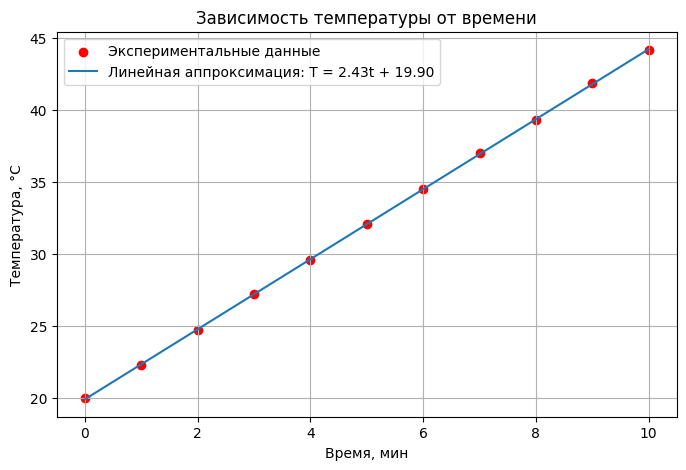

Коэффициенты линейной модели:
a = 2.4336363636363636
b = 19.90454545454546

Среднеквадратичное отклонение: 0.05828116518118019


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

# Линейная регрессия: T = a * t + b
# polyfit возвращает [a, b] для полинома первой степени
a, b = np.polyfit(t, T, 1)

# Вычисляем значения по модели
T_model = lambda x: a * x + b

plt.figure(figsize=(8, 5))
plt.scatter(t, T, color='red', label='Экспериментальные данные')
plt.plot(t, [T_model(x) for x in t], label=f'Линейная аппроксимация: T = {a:.2f}t + {b:.2f}')
plt.xlabel("Время, мин")
plt.ylabel("Температура, °C")
plt.title("Зависимость температуры от времени")
plt.legend()
plt.grid()
plt.show()

# СКО
rmse = calculate_rmse(t, T, T_model)

print("Коэффициенты линейной модели:")
print(f"a = {a}")
print(f"b = {b}")
print(f"\nСреднеквадратичное отклонение: {rmse}")



# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])




## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

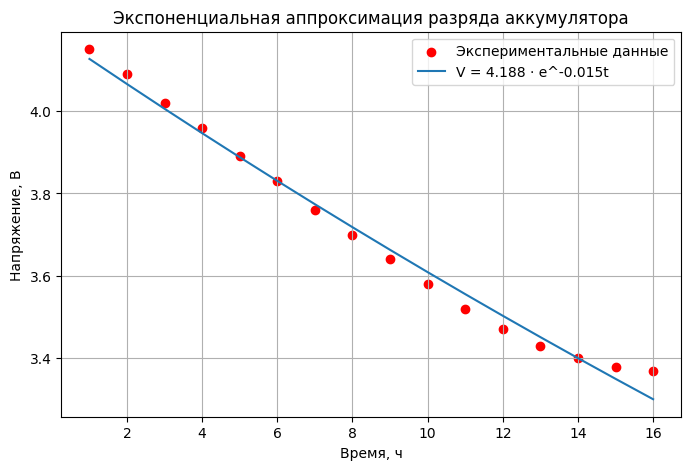

Коэффициенты экспоненциальной модели:
a = 4.188328267627173
b = -0.014886291052836741

Среднеквадратичное отклонение (СКО): 0.027380175739055688


In [ ]:
# Линеаризация
lnV = np.log(voltage)

# Прямая регрессия ln(V) = ln(a) + b*t
b, ln_a = np.polyfit(hours, lnV, 1)
a = np.exp(ln_a)

# модель напряжения
V_model = lambda t: a * np.exp(b * t)

# Построение графика
plt.figure(figsize=(8, 5))
plt.scatter(hours, voltage, color='red', label='Экспериментальные данные')
plt.plot(hours, [V_model(t) for t in hours], label=f'V = {a:.3f} · e^{b:.3f}t')
plt.xlabel("Время, ч")
plt.ylabel("Напряжение, В")
plt.title("Экспоненциальная аппроксимация разряда аккумулятора")
plt.legend()
plt.grid()
plt.show()

# СКО
rmse = calculate_rmse(hours, voltage, V_model)

print("Коэффициенты экспоненциальной модели:")
print(f"a = {a}")
print(f"b = {b}")
print(f"\nСреднеквадратичное отклонение (СКО): {rmse}")

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите **степенную зависимость** вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.

2. Выполните **логарифмическую линеаризацию**: преобразуйте исходные координаты, взяв логарифмы обеих частей:
   $\ln(BMR) = \ln(c) + \alpha \ln(M)$

3. Постройте **линейную регрессию** для преобразованных координат $(\ln M, \ln BMR)$:
   - Найдите параметры линии регрессии
   - Вычислите $R^2$ для линеаризованной модели
   - Оцените погрешность определения параметров

4. Восстановите исходные параметры степенной функции:
   - Найдите $c = e^b$, где $b$ — свободный член линейной регрессии
   - Получите показатель степени $\alpha$

5. Создайте **комплексную визуализацию**:
   - График в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии
   - График в исходных координатах с степенной кривой
   - График остатков в обоих представлениях

6. Вычислите **коэффициент детерминации** $R^2$ для исходной степенной модели и сравните с линеаризованной.

7. Проанализируйте результаты:
   - Согласуется ли найденное значение $\alpha$ с известным результатом Клейбера (теоретически $\alpha \approx 0.75$)?
   - Что означает показатель степени $\alpha$ с физиологической точки зрения?
   - Как соотносятся поверхность и объём тела животного с показателем 0.75?

8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг
   - Енота массой 8 кг
   - Синего кита массой 150 000 кг

---

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


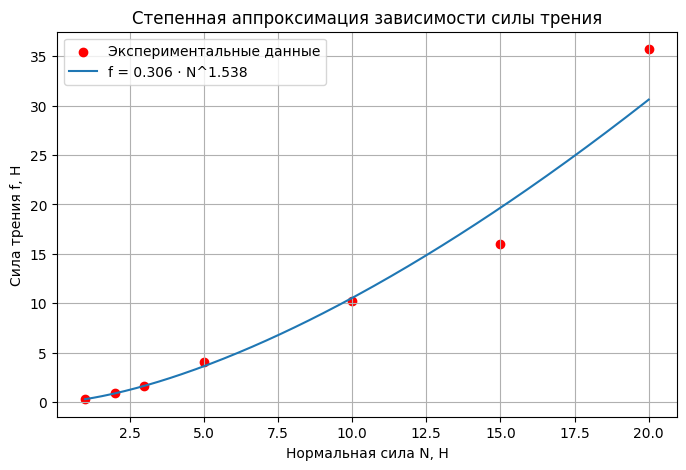

Коэффициенты степенной модели:
c = 0.305561942945088
alpha = 1.537774508449261

Среднеквадратичное отклонение (СКО): 2.3923388310924185

Коэффициент детерминации R^2: 0.9590254757895401

Прогноз силы трения при N = 25 Н: 43.13360655172717


In [ ]:
# Нормальная сила (N) и сила трения (f)
N = np.array([1, 2, 3, 5, 10, 15, 20])
f = np.array([0.30, 0.88, 1.65, 4.08, 10.21, 15.95, 35.70])

# Определение коэффициентов

# Линеаризация: ln(f) = ln(c) + alpha * ln(N)
lnN = np.log(N)
lnf = np.log(f)

alpha, ln_c = np.polyfit(lnN, lnf, 1)
c = np.exp(ln_c)

# модель вида f = c * N^alpha
f_model = lambda x: c * (x ** alpha)


# Построение графика
plt.figure(figsize=(8, 5))
plt.scatter(N, f, color='red', label='Экспериментальные данные')

# гладкая линия модели
N_smooth = np.linspace(1, 20, 200)
plt.plot(N_smooth, [f_model(n) for n in N_smooth],
         label=f'f = {c:.3f} · N^{alpha:.3f}')

plt.xlabel("Нормальная сила N, Н")
plt.ylabel("Сила трения f, Н")
plt.title("Степенная аппроксимация зависимости силы трения")
plt.legend()
plt.grid()
plt.show()


# СКО
rmse = calculate_rmse(N, f, f_model)

print("Коэффициенты степенной модели:")
print(f"c = {c}")
print(f"alpha = {alpha}")
print(f"\nСреднеквадратичное отклонение (СКО): {rmse}")


# R^2
f_pred = np.array([f_model(x) for x in N])
ss_res = np.sum((f - f_pred)**2)
ss_tot = np.sum((f - np.mean(f))**2)
R2 = 1 - ss_res/ss_tot

print("\nКоэффициент детерминации R^2:", R2)


# Прогноз при N = 25
f25 = f_model(25)
print("\nПрогноз силы трения при N = 25 Н:", f25)